In [25]:
#TASK 1
#NAME : SHREEYA SANTHANAM
#HEAD COORDINATOR : ASHISH KUMAR

#importing all the essential libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [26]:
#defining the dataset paths
dataset = pd.read_csv('Documents/Cureya_datasets/task_1.csv')

In [27]:
#printing the number of columns and rows
print(dataset.shape)

(1338, 7)


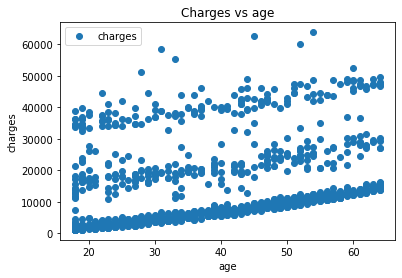

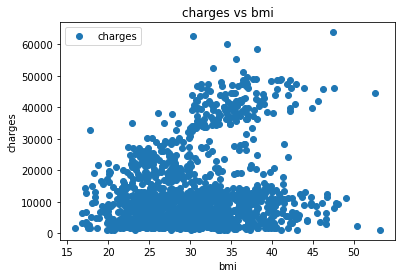

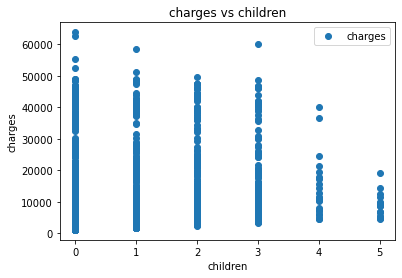

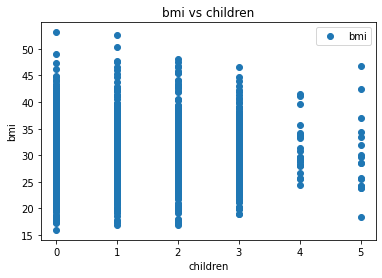

In [28]:
#plotting charges vs age 
dataset.plot(x='age', y='charges',style='o')
plt.title('Charges vs age')
plt.xlabel('age')
plt.ylabel('charges')
plt.show()
#plotting charges with bmi
dataset.plot(x='bmi',y='charges',style='o')
plt.title('charges vs bmi')
plt.xlabel('bmi')
plt.ylabel('charges')
plt.show()
#plotting charges with children
dataset.plot(x='children',y='charges',style='o')
plt.title('charges vs children')
plt.xlabel('children')
plt.ylabel('charges')
plt.show()
#plotting bmi vs children
dataset.plot(x='children',y='bmi',style='o')
plt.title('bmi vs children')
plt.xlabel('children')
plt.ylabel('bmi')
plt.show()

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


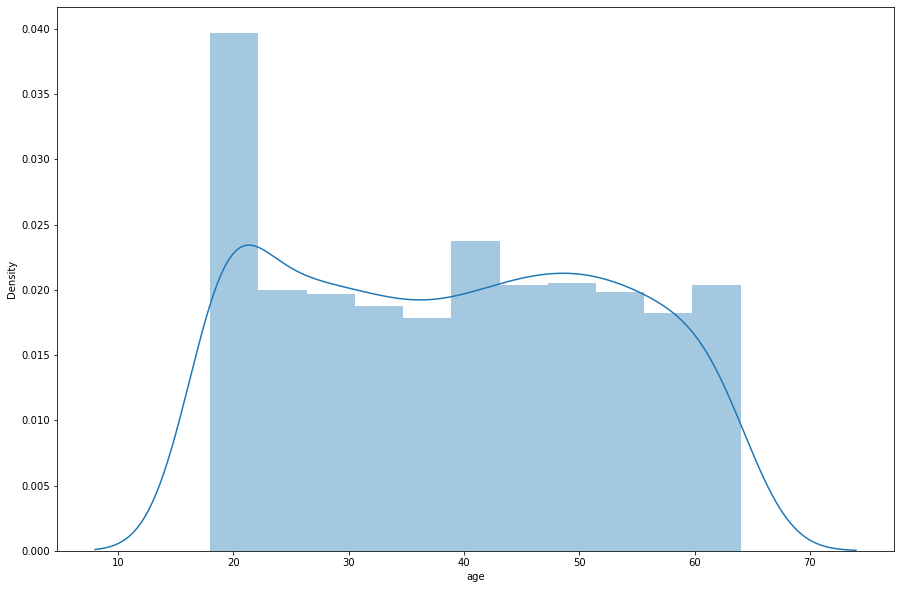

In [29]:
#average of variable age is plotted
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['age'])
plt.show()

In [30]:
#converting the categorical data into binary data
dataset = pd.get_dummies(dataset, columns=['sex'])
dataset = pd.get_dummies(dataset, columns=['smoker'])

dataset = pd.get_dummies(dataset, columns=['region'], prefix='region')
dataset.head()


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [31]:
#assigning independent and dependent variables
X = dataset[['age','bmi','children','sex_female','sex_male','smoker_no','smoker_yes','region_northeast','region_northwest','region_southeast','region_southwest']]
y=dataset['charges']

In [32]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)


In [33]:
#using multiple linear regression and hence training the model
regressor= LinearRegression()
hist = regressor.fit(X_train, y_train)

In [34]:
#calculating the intercept and coefficient
print('Intercept:',regressor.intercept_)
print('Coefficient',regressor.coef_)

Intercept: -517.1368358425643
Coefficient [ 2.53700500e+02  3.35962814e+02  4.36910121e+02  7.73186394e+00
 -7.73186394e+00 -1.18025086e+04  1.18025086e+04  4.83840068e+02
  2.23707336e+02 -4.29438766e+02 -2.78108638e+02]


In [35]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
print(df)

           Actual     Predicted
578    9724.53000  11169.927119
610    8547.69130   9486.709085
569   45702.02235  38181.123053
1034  12950.07120  16266.313289
198    9644.25250   6914.648007
...           ...           ...
1084  15019.76005  14760.230968
726    6664.68595   8277.984346
1132  20709.02034  16149.973370
725   40932.42950  32904.758143
963    9500.57305   9467.614058

[268 rows x 2 columns]


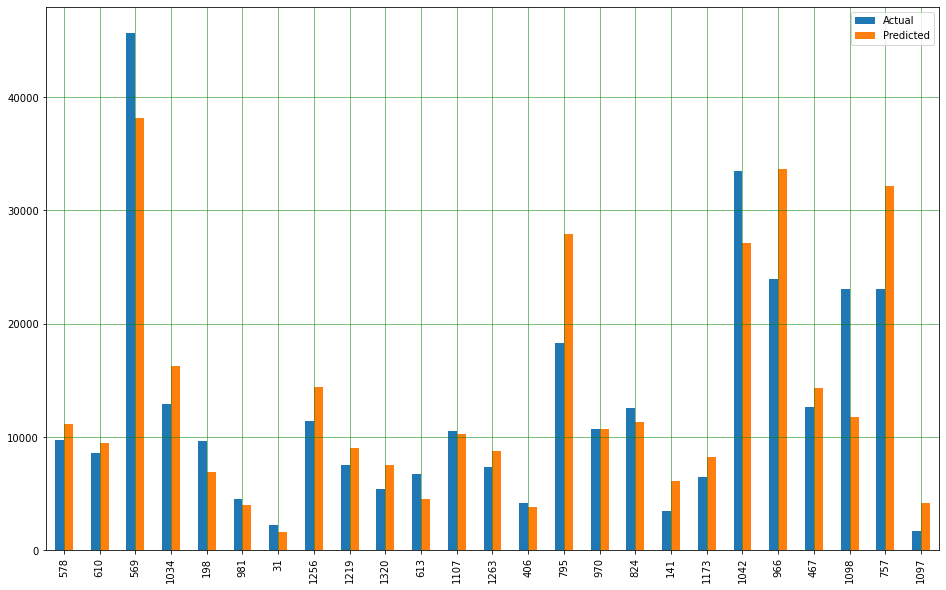

In [36]:
#plotting the actual and predicted values for clear visualisation
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

In [37]:
#calculating the accuracy of the model
print('Accuracy on training set:{:.2f}'.format(regressor.score(X_train,y_train)))
print('Accuracy on test set : {:.2f}'.format(regressor.score(X_test,y_test)))

Accuracy on training set:0.74
Accuracy on test set : 0.80
